In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [4]:
df_m = pd.read_csv(r"C:\Users\tharu\OneDrive\Documents\course certificates\iplall\matches.csv")
df_d = pd.read_csv(r"C:\Users\tharu\OneDrive\Documents\course certificates\iplall\deliveries.csv")

In [5]:
print(df_m.columns)
print(df_d.columns)

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2'],
      dtype='object')
Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs',
       'total_runs', 'extras_type', 'is_wicket', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')


In [6]:
df_finals = df_m[df_m['match_type'] == 'Final']

## Determining which toss choice got a higher probability of winning in the finals.

In [96]:
df_toss = df_finals[['toss_winner','toss_decision','winner']]
win = np.array([])

In [98]:
for index, row in df_toss.iterrows():
    if row['toss_winner'] == row['winner']:
        win = np.append(win, row['toss_decision'])
    else :
        if row['toss_decision'] == "bat":
            win = np.append(win, "field")
        else :
            win = np.append(win, "bat")
print(win)

['field' 'bat' 'bat' 'bat' 'field' 'bat' 'field' 'bat' 'bat' 'bat' 'field'
 'bat' 'field' 'bat' 'field' 'field' 'field']


In [18]:
frequency = Counter(win)
labels = list(frequency.keys())
counts = list(frequency.values())


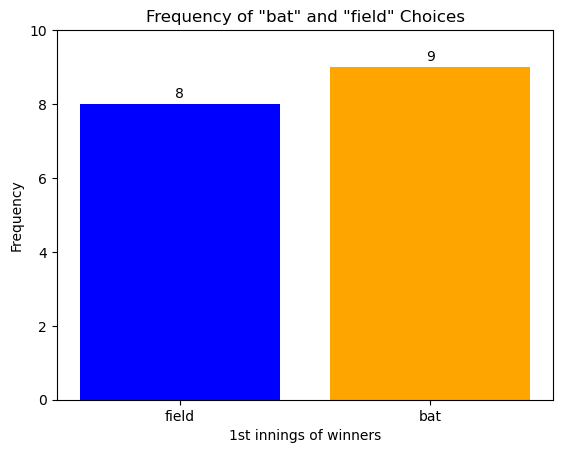

In [20]:
plt.bar(labels, counts, color=['blue', 'orange'])

counts = [int(count) for count in counts]

plt.title('Frequency of "bat" and "field" Choices')
plt.xlabel('1st innings of winners')
plt.ylabel('Frequency')

plt.ylim(0, max(counts) + 1) 


for i, count in enumerate(counts):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
plt.show()

### Result - Based on the details of pitch of the ground (batting / bowling pitch) it will be choosen but there is no probabilty luck 

# Strength and Weakness 

## 1. Virat Kholi

### No.of Player of the match titles

In [81]:
df_pom = df_m[df_m['player_of_match'] == 'V Kohli']

player_of_matches = df_pom.shape[0]
print("Player of the matches = ", player_of_matches)

Player of the matches =  18


#### Player of the matches =  jersey lol 

In [79]:
frequency = df_m[['player_of_match']].value_counts()

print(frequency.head(5))

player_of_match
AB de Villiers     25
CH Gayle           22
RG Sharma          19
DA Warner          18
V Kohli            18
Name: count, dtype: int64


In [94]:
df_vk = df_d[(df_d['batter'] == 'V Kohli') | (df_d['non_striker'] == 'V Kohli')]

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
132,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,2,V Kohli,I Sharma,W Jaffer,0,0,0,NaN,0,NaN,NaN,NaN
133,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,3,V Kohli,I Sharma,W Jaffer,0,4,4,legbyes,0,NaN,NaN,NaN
134,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,4,V Kohli,I Sharma,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
135,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,5,W Jaffer,I Sharma,V Kohli,0,0,0,NaN,0,NaN,NaN,NaN
136,335982,2,Royal Challengers Bangalore,Kolkata Knight Riders,1,6,W Jaffer,I Sharma,V Kohli,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260284,1426310,1,Royal Challengers Bengaluru,Rajasthan Royals,6,5,C Green,R Ashwin,V Kohli,0,1,1,wides,0,NaN,NaN,NaN
260285,1426310,1,Royal Challengers Bengaluru,Rajasthan Royals,6,6,C Green,R Ashwin,V Kohli,1,0,1,NaN,0,NaN,NaN,NaN
260286,1426310,1,Royal Challengers Bengaluru,Rajasthan Royals,6,7,V Kohli,R Ashwin,C Green,1,0,1,NaN,0,NaN,NaN,NaN
260287,1426310,1,Royal Challengers Bengaluru,Rajasthan Royals,7,1,V Kohli,YS Chahal,C Green,0,0,0,NaN,0,NaN,NaN,NaN
